# Linear Regression

   time  cells
0   0.1    209
1   0.2    212
2   0.3    218
3   0.4    221
4   0.5    225


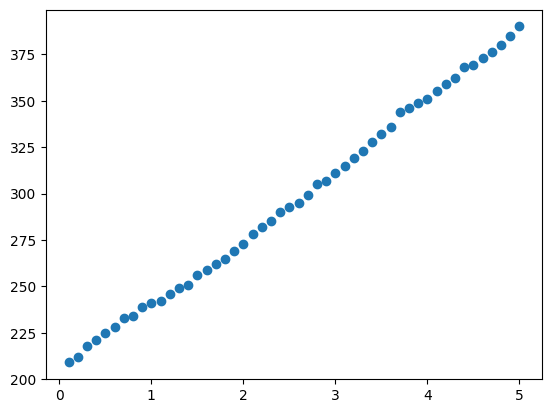

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cells.csv')
print(df.head())
plt.scatter(x="time", y="cells", data=df)


In [9]:
x_df = df.drop('cells', axis='columns')
print(x_df.dtypes)   
y_df = df.cells


time    float64
dtype: object


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.3, random_state=42)

from sklearn import linear_model
model = linear_model.LinearRegression()  
model.fit(X_train, y_train)

print(model.score(X_train, y_train)) 


0.9981325969917917


In [14]:
prediction_test = model.predict(X_test)    
print(y_test, prediction_test)

13    251
39    351
30    315
45    373
17    265
48    385
26    299
25    295
32    323
19    273
12    249
4     225
37    346
8     239
3     221
Name: cells, dtype: int64 [254.49066427 350.40206114 317.20196223 372.53546042 269.24626379
 383.60216006 302.44636271 298.75746283 324.57976199 276.62406355
 250.80176439 221.29056536 343.02426138 236.04616488 217.60166548]


In [17]:
print("Mean sq. errror between y_test and predicted =", np.mean((prediction_test-y_test)**2))

Mean sq. errror between y_test and predicted = 8.356796185625386


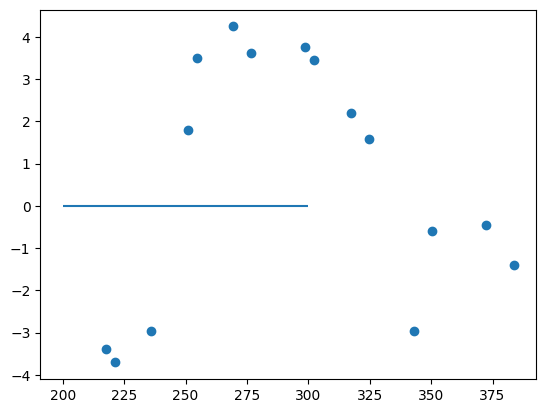

In [16]:
plt.scatter(prediction_test, prediction_test-y_test)
plt.hlines(y=0, xmin=200, xmax=300)

# Multilinear Regression

In [32]:
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv('heart_data.csv')
print(df.head())


   Unnamed: 0     biking    smoking  heart.disease
0           1  30.801246  10.896608      11.769423
1           2  65.129215   2.219563       2.854081
2           3   1.959665  17.588331      17.177803
3           4  44.800196   2.802559       6.816647
4           5  69.428454  15.974505       4.062224


C:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


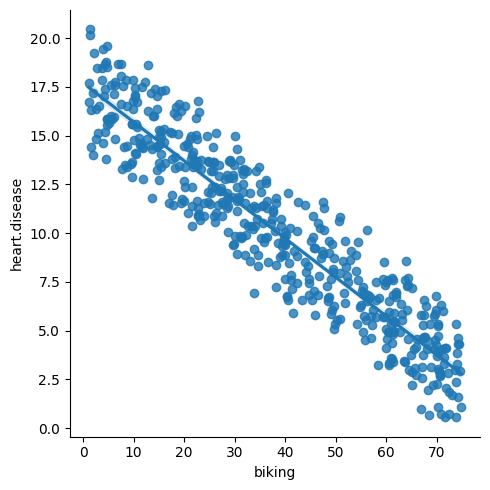

In [33]:
df = df.drop("Unnamed: 0", axis=1)
sns.lmplot(x='biking', y='heart.disease', data=df)  


C:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


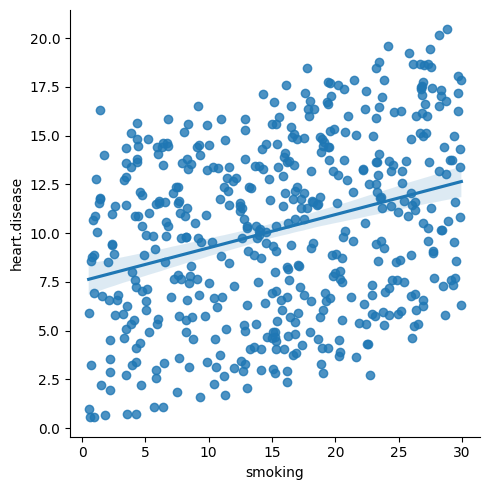

In [34]:
sns.lmplot(x='smoking', y='heart.disease', data=df)  

In [35]:
x_df = df.drop('heart.disease', axis=1)
y_df = df['heart.disease']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.3, random_state=42)

from sklearn import linear_model

model = linear_model.LinearRegression()


In [40]:
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

0.9811067878031208


In [41]:
prediction_test = model.predict(X_test)    
print(y_test, prediction_test)


487     6.756015
73      9.466026
231    14.088654
175    13.377430
237    16.384678
         ...    
193    14.547755
5       9.550046
116    14.411483
45     12.328899
16      5.443342
Name: heart.disease, Length: 150, dtype: float64 [ 5.61417231  9.23854928 15.77064591 13.96271678 16.97258754 13.38551065
  7.02565417  9.49069576  6.83117942 12.07219675  8.04307687 10.14595377
  5.91159788 10.14538696  7.3415733  17.65460707  4.15655062  6.87547269
  5.24683245  6.77480127  2.08250582  7.39533445 12.03453847 13.99326278
 12.09739539 13.60433903  6.19490735  9.56118094 13.94750676 11.82223539
  8.52602497 11.48105164 12.41957266 17.7284097   3.53706181  6.09047121
  8.17208463  7.50053942 12.56170624 10.47015413  4.88309485  4.00779535
  7.798394   10.9073288  10.77541879  8.85290916 17.03995211  7.50903037
 18.06939528  4.58997823  1.73224979  5.01082459  6.82467948 15.23572133
  9.30772808  6.34302188  8.37575419 10.34808915 13.74750805  3.50515222
  7.30319722  6.67918277 13.686728

In [42]:
print("Mean sq. errror between y_test and predicted =", np.mean((prediction_test-y_test)**2))

print(model.coef_, model.intercept_)

Mean sq. errror between y_test and predicted = 0.4364830992783997
[-0.20006703  0.17674695] 15.011790209350535


In [2]:
import cv2
import numpy as np

# List of image paths
images = ['Photo0.jpeg', 'Photo1.jpeg', 'Photo2.jpeg', 'Photo3.jpeg', 'Photo4.jpeg']

def unary_coding(image):
    # Flatten the image
    pixels = image.flatten()

    # Perform Unary Coding
    encoded_pixels = []
    for pixel in pixels:
        encoded_pixels.append('1' * pixel + '0')

    # Construct the encoded image
    encoded_image = ''.join(encoded_pixels)

    return encoded_image

for image_path in images:
    # Load the image
    image = cv2.imread(image_path, 0)

    # Perform Unary Coding
    encoded_image = unary_coding(image)

    # Calculate the RMS and SNR values
    rms = np.sqrt(np.mean(image**2))
    snr = 20 * np.log10(np.max(image) / rms)

    print(f'Image: {image_path}, RMS: {rms}, SNR: {snr}')


Image: Photo0.jpeg, RMS: 10.552756774253288, SNR: 27.663485040746135
Image: Photo1.jpeg, RMS: 10.365612920238307, SNR: 27.8189038669463
Image: Photo2.jpeg, RMS: 10.429956703220569, SNR: 27.765153496891383
Image: Photo3.jpeg, RMS: 10.328774048753978, SNR: 27.849828069782188
Image: Photo4.jpeg, RMS: 10.048784677044324, SNR: 28.08853280134845
